In [3]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import plotly.express as px
import pymongo

In [4]:
# Read in the dataset. 
healthcare_df = pd.read_csv("healthcare_dataset.csv")
healthcare_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [5]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")


In [6]:
# Convert dataframe to dictionary
data = healthcare_df.to_dict(orient='records')

# Choose a database and a collection
db = client["Healthcare_DB"]
collection = db["Healthcare"]

# Insert data into MongoDB
collection.insert_many(data)


InsertManyResult([ObjectId('6614945e90fd9e2e7e95cf9a'), ObjectId('6614945e90fd9e2e7e95cf9b'), ObjectId('6614945e90fd9e2e7e95cf9c'), ObjectId('6614945e90fd9e2e7e95cf9d'), ObjectId('6614945e90fd9e2e7e95cf9e'), ObjectId('6614945e90fd9e2e7e95cf9f'), ObjectId('6614945e90fd9e2e7e95cfa0'), ObjectId('6614945e90fd9e2e7e95cfa1'), ObjectId('6614945e90fd9e2e7e95cfa2'), ObjectId('6614945e90fd9e2e7e95cfa3'), ObjectId('6614945e90fd9e2e7e95cfa4'), ObjectId('6614945e90fd9e2e7e95cfa5'), ObjectId('6614945e90fd9e2e7e95cfa6'), ObjectId('6614945e90fd9e2e7e95cfa7'), ObjectId('6614945e90fd9e2e7e95cfa8'), ObjectId('6614945e90fd9e2e7e95cfa9'), ObjectId('6614945e90fd9e2e7e95cfaa'), ObjectId('6614945e90fd9e2e7e95cfab'), ObjectId('6614945e90fd9e2e7e95cfac'), ObjectId('6614945e90fd9e2e7e95cfad'), ObjectId('6614945e90fd9e2e7e95cfae'), ObjectId('6614945e90fd9e2e7e95cfaf'), ObjectId('6614945e90fd9e2e7e95cfb0'), ObjectId('6614945e90fd9e2e7e95cfb1'), ObjectId('6614945e90fd9e2e7e95cfb2'), ObjectId('6614945e90fd9e2e7e95cf

In [7]:
print(client.list_database_names())

['Healthcare_DB', 'admin', 'classDB', 'config', 'dbName', 'fruits_db', 'local', 'met', 'travel_db', 'uk_food']


In [8]:
db = client['Healthcare_DB']

In [9]:

print(db.list_collection_names())

['Healthcare']


In [10]:
document=db['Healthcare'].find_one()
pprint(document)

{'Admission Type': 'Elective',
 'Age': 81,
 'Billing Amount': 37490.98336352819,
 'Blood Type': 'O-',
 'Date of Admission': '2022-11-17',
 'Discharge Date': '2022-12-01',
 'Doctor': 'Patrick Parker',
 'Gender': 'Female',
 'Hospital': 'Wallace-Hamilton',
 'Insurance Provider': 'Medicare',
 'Medical Condition': 'Diabetes',
 'Medication': 'Aspirin',
 'Name': 'Tiffany Ramirez',
 'Room Number': 146,
 'Test Results': 'Inconclusive',
 '_id': ObjectId('660f5d9ea229b4fe879b1070')}


In [11]:
new_df = healthcare_df.drop(['Name', 'Doctor', 'Hospital', 'Room Number'], axis=1)
new_df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,2022-07-29,UnitedHealthcare,39606.840083,Elective,2022-08-02,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,2022-01-06,Blue Cross,5995.717488,Emergency,2022-01-29,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,2022-07-01,Blue Cross,49559.202905,Elective,2022-07-15,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,2020-02-06,UnitedHealthcare,25236.344761,Urgent,2020-02-26,Penicillin,Normal


In [12]:
df_stats = new_df.describe(include='all')
print(df_stats)

                 Age  Gender Blood Type Medical Condition Date of Admission  \
count   10000.000000   10000      10000             10000             10000   
unique           NaN       2          8                 6              1815   
top              NaN  Female        AB-            Asthma        2019-04-12   
freq             NaN    5075       1275              1708                15   
mean       51.452200     NaN        NaN               NaN               NaN   
std        19.588974     NaN        NaN               NaN               NaN   
min        18.000000     NaN        NaN               NaN               NaN   
25%        35.000000     NaN        NaN               NaN               NaN   
50%        52.000000     NaN        NaN               NaN               NaN   
75%        68.000000     NaN        NaN               NaN               NaN   
max        85.000000     NaN        NaN               NaN               NaN   

       Insurance Provider  Billing Amount Admission

In [13]:
def summary(healthcare_df):
    summ = pd.DataFrame(healthcare_df.dtypes, columns=['data type'])
    summ['number of missing values'] = healthcare_df.isnull().sum().values 
    summ['missing%'] = healthcare_df.isnull().sum().values / len(healthcare_df) * 100
    summ['#unique'] = healthcare_df.nunique().values

    return summ.style

In [14]:
summary(new_df)

,data type,number of missing values,missing%,#unique
Age,int64,0,0.000000,68
Gender,object,0,0.000000,2
Blood Type,object,0,0.000000,8
Medical Condition,object,0,0.000000,6
Date of Admission,object,0,0.000000,1815
Insurance Provider,object,0,0.000000,5
Billing Amount,float64,0,0.000000,10000
Admission Type,object,0,0.000000,3
Discharge Date,object,0,0.000000,1834
Medication,object,0,0.000000,5


In [15]:
new_df['Date of Admission'] = pd.to_datetime(new_df['Date of Admission'])
new_df['Discharge Date'] = pd.to_datetime(new_df['Discharge Date'])

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Insurance Provider  10000 non-null  object        
 6   Billing Amount      10000 non-null  float64       
 7   Admission Type      10000 non-null  object        
 8   Discharge Date      10000 non-null  datetime64[ns]
 9   Medication          10000 non-null  object        
 10  Test Results        10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 859.5+ KB


In [17]:
new_df['Duration'] = np.nan
for i in range(len(new_df['Duration'])):
    new_df.loc[i, 'Duration'] = (new_df.loc[i, 'Discharge Date'] - new_df.loc[i, 'Date of Admission']).days



In [18]:
new_df['Duration'] = new_df['Duration'].astype(int)

<Figure size 640x480 with 0 Axes>

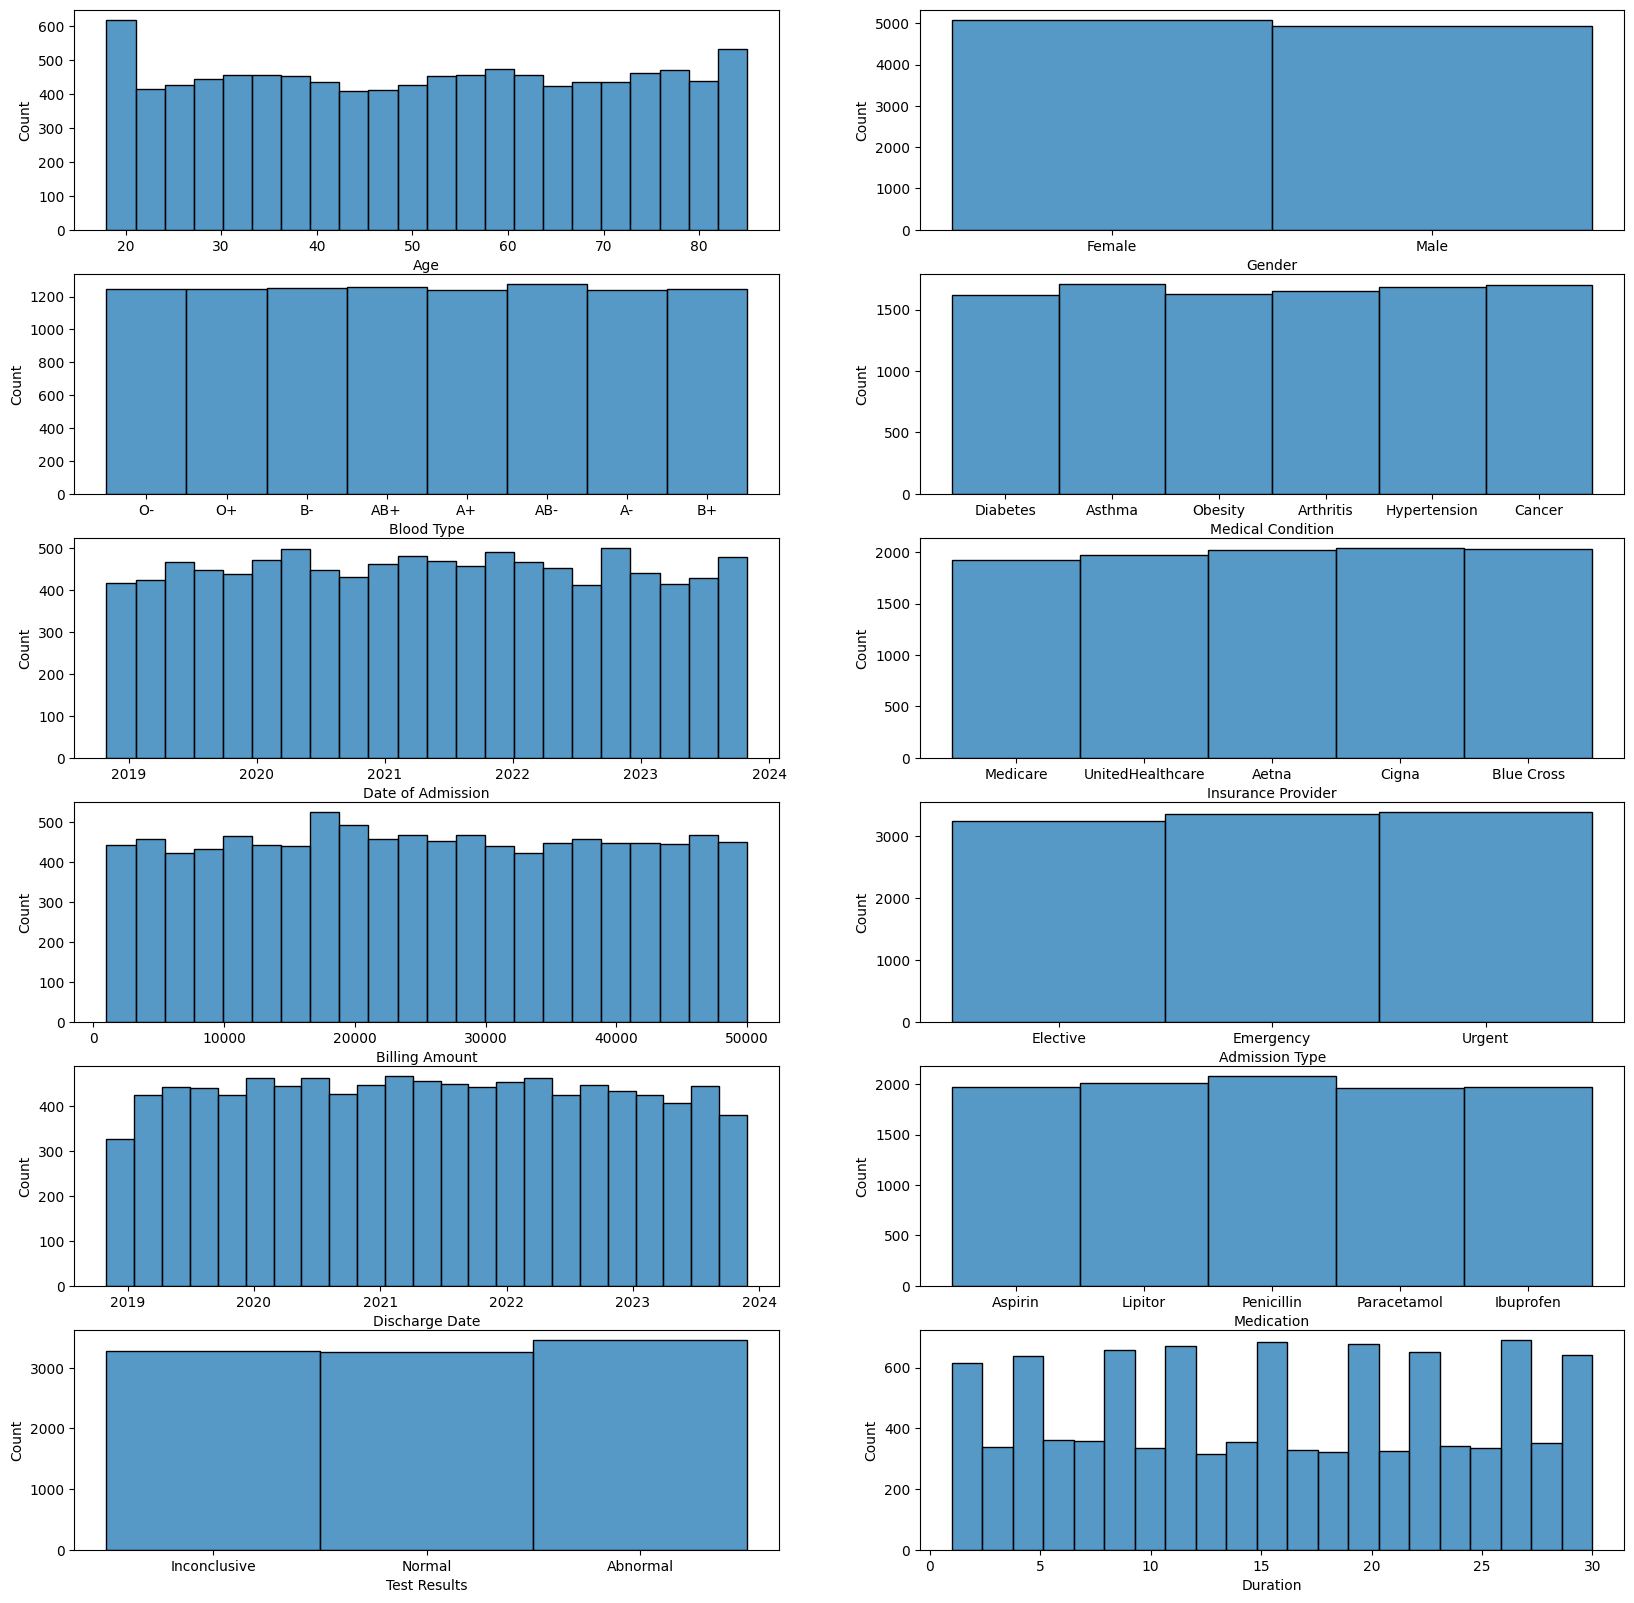

In [19]:
plt.subplots_adjust(hspace=0.5)
fig, axs = plt.subplots(6, 2, figsize=(20, 20))
i = 0
for column in new_df.columns:
    # Create histogram for each column
    sns.histplot(data=new_df, x=column, ax=axs[i//2, i%2])
    i += 1

plt.show()

In [20]:
new_df[new_df['Medical Condition'] == 'Asthma']['Duration'].describe()

count    1708.000000
mean       15.481265
std         8.649675
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        30.000000
Name: Duration, dtype: float64

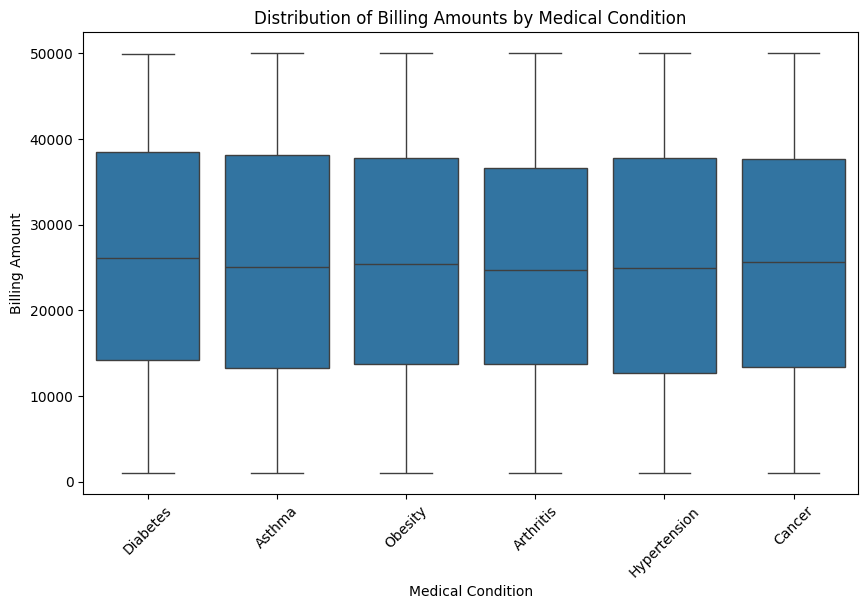

In [21]:
# Group by medical condition or treatment and calculate summary statistics
summary_stats = new_df.groupby('Medical Condition')['Billing Amount'].agg(['mean', 'median', 'count'])

# Visualize the distribution of billing amounts for different medical conditions
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='Medical Condition', y='Billing Amount')
plt.xticks(rotation=45)
plt.title('Distribution of Billing Amounts by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()



In [22]:
# Perform t-test to compare billing amounts between different medical conditions
medical_conditions = new_df['Medical Condition'].unique()

for condition1, condition2 in combinations(medical_conditions, 2):
    group1 = new_df[new_df['Medical Condition'] == condition1]['Billing Amount']
    group2 = new_df[new_df['Medical Condition'] == condition2]['Billing Amount']
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < 0.05:  # significance level of 0.05
        print(f"Significant difference in billing amounts between {condition1} and {condition2}: p-value = {p_value}"),
    else:
        print(f"No significant difference in billing amounts between {condition1} and {condition2}: p-value = {p_value}")

No significant difference in billing amounts between Diabetes and Asthma: p-value = 0.19092443569842035
No significant difference in billing amounts between Diabetes and Obesity: p-value = 0.4905409681311237
No significant difference in billing amounts between Diabetes and Arthritis: p-value = 0.07245106748139886
No significant difference in billing amounts between Diabetes and Hypertension: p-value = 0.07822851366817599
No significant difference in billing amounts between Diabetes and Cancer: p-value = 0.2851002033367627
No significant difference in billing amounts between Asthma and Obesity: p-value = 0.5365532348905022
No significant difference in billing amounts between Asthma and Arthritis: p-value = 0.6368161417096003
No significant difference in billing amounts between Asthma and Hypertension: p-value = 0.6544150468506069
No significant difference in billing amounts between Asthma and Cancer: p-value = 0.8017629939295012
No significant difference in billing amounts between Obesi

In [23]:
new_df.to_csv('Healthcare_CleanSet.csv', index=False)